# STA365: Applied Bayesian Inference HW 4
---
## Question 1

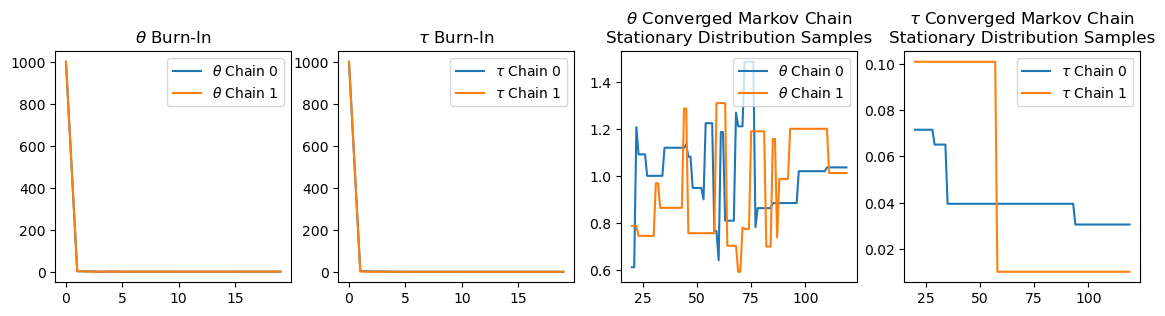

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

n = 30; s = 1; m = 0; x = stats.norm(loc=m, scale=s).rvs(size=n)
alpha, lamb = 1,1
theta0, tau0 = 1,1
C,G = 2,10000  # chains, Gibbs samples
theta,tau = np.zeros([C,G]),np.zeros([C,G])
theta[:,0] = 1000  # initialization
tau[:,0] = 1000  # initialization
for c in range(C):
    for g in range(1,G):
        
        tau_target = lambda tau_: np.prod(stats.norm(loc=theta[c,g-1], scale = 1/tau_**0.5).pdf(x) * stats.gamma(a=alpha/2, scale = lamb/2).pdf(tau_))
        tau_proposal = stats.expon(scale=2)
        tau_tilde = tau_proposal.rvs()
        mh_calc = tau_target(tau_tilde)/tau_target(tau[c,g-1]) *\
        (tau_proposal.pdf(tau[c,g-1])/tau_proposal.pdf(tau_tilde))

        if stats.uniform.rvs() < min(1, mh_calc):
            tau[c,g] = tau_tilde
        else:
            tau[c,g] = tau[c,g-1]


        theta_target = lambda theta_: np.prod(stats.norm(loc=theta_, scale = 1/tau[c,g]**0.5).pdf(x) * stats.norm(loc=theta0, scale=tau0).pdf(theta_))
        theta_proposal = stats.expon(scale=2)
        theta_tilde = theta_proposal.rvs()
        mh_calc = theta_target(theta_tilde)/theta_target(theta[c,g-1]) *\
        (theta_proposal.pdf(theta[c,g-1])/theta_proposal.pdf(theta_tilde))

        if stats.uniform.rvs() < min(1, mh_calc):
            theta[c,g] = theta_tilde
        else:
            theta[c,g] = theta[c,g-1]
        

fig,ax = plt.subplots(1, 4, figsize=(14,3))
ax[0].set_title("$\\theta$ Burn-In")
ax[1].set_title("$\\tau$ Burn-In")
ax[2].set_title("$\\theta$ Converged Markov Chain\nStationary Distribution Samples")
ax[3].set_title("$\\tau$ Converged Markov Chain\nStationary Distribution Samples")
burn = 20
demo = 120
for c in range(C):
    ax[0].plot(theta[c,:burn], label="$\\theta$ Chain "+str(c))
    ax[1].plot(tau[c,:burn], label="$\\tau$ Chain "+str(c))
    ax[2].plot(np.arange(burn, demo, dtype=int), theta[c,burn:demo], label="$\\theta$ Chain "+str(c))
    ax[3].plot(np.arange(burn, demo, dtype=int), tau[c,burn:demo], label="$\\tau$ Chain "+str(c))
ax[0].legend(); ax[1].legend(); ax[2].legend(); ax[3].legend(); plt.show('png')

95% Credible Interval (Mean): [0.62157318 0.7594212 ]
95% Credible Interval (SD): [4.53769201 6.17854548]


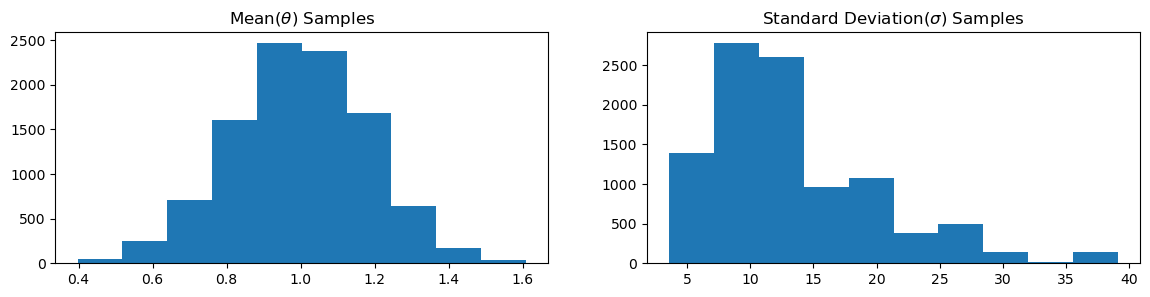

In [5]:
fig,ax = plt.subplots(1,2, figsize=(14,3))
ax[0].hist(theta[0,burn:])
ax[1].hist(1/(tau[0,burn:])**0.5)
ax[0].set_title('Mean($\\theta$) Samples')
ax[1].set_title('Standard Deviation($\\sigma$) Samples')

print("95% Credible Interval (Mean): " + str(np.quantile(theta[0,burn:], [0.025,0.0975])))
print("95% Credible Interval (SD): " + str(np.quantile(1/(tau[0,burn:]**0.5), [0.025,0.0975])))
plt.show('png')

- I opted for independent exponential proposal distributions to ensure positive values of $\tau$.
- Compared to the Gibbs sampler without Metropolis-Hastings, this sampler...
    -  is 'stickier' in the sense that there are periods in the chain that are stationary and flat as seen in the plots above
    -  has wider credible intervals because we're not sampling directly from the full conditional distributions and rather accepting and rejecting proposals, leading to more autocorrelation (clearly seen by the flat portions of the plots)

## Question 2

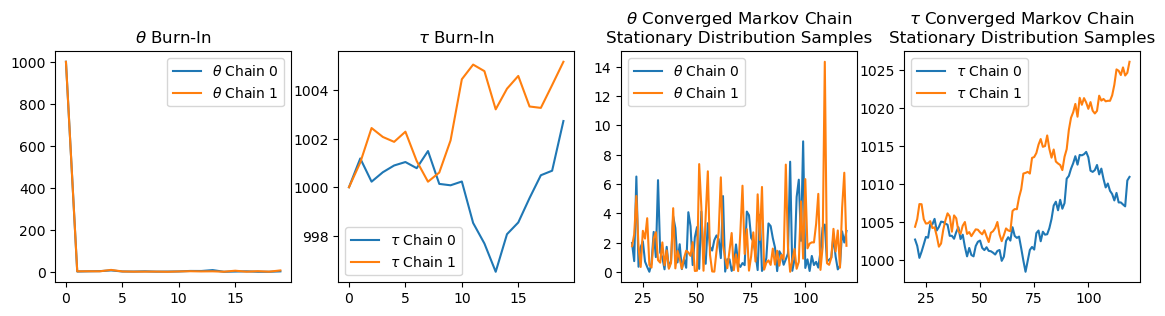

In [6]:
n = 30; s = 1; m = 0; x = stats.norm(loc=m, scale=s).rvs(size=n)
alpha, lamb = 1,1
# theta0, tau0 = 1,1
C,G = 2,10000  # chains, Gibbs samples
theta,tau = np.zeros([C,G]),np.zeros([C,G])
theta[:,0] = 1000  # initialization
tau[:,0] = 1000  # initialization
for c in range(C):
    for g in range(1,G):
        
        tau_target = lambda tau_: np.prod(stats.norm(loc=theta[c,g-1], scale = 1/tau_**0.5).pdf(x) * stats.gamma(a=alpha/2, scale = lamb/2).pdf(tau_))
        tau_proposal = stats.truncnorm(a=-tau[c,g-1]/s, b=np.inf,
                                       loc=tau[c,g-1], scale=s)
        tau_tilde = tau_proposal.rvs()
        mh_calc = tau_target(tau_tilde)/tau_target(tau[c,g-1]) *\
        (tau_proposal.pdf(tau[c,g-1])/tau_proposal.pdf(tau_tilde))

        if stats.uniform.rvs() < min(1, mh_calc):
            tau[c,g] = tau_tilde
        else:
            tau[c,g] = tau[c,g-1]


        theta_target = lambda theta_: np.prod(stats.norm(loc=theta_, scale = 1/tau[c,g]**0.5).pdf(x) * stats.logistic(loc=theta0, scale=tau0).pdf(theta_))
        theta_proposal = stats.expon(scale=2)
        theta_tilde = theta_proposal.rvs()
        mh_calc = theta_target(theta_tilde)/theta_target(theta[c,g-1]) *\
        (theta_proposal.pdf(theta[c,g-1])/theta_proposal.pdf(theta_tilde))

        if stats.uniform.rvs() < min(1, mh_calc):
            theta[c,g] = theta_tilde
        else:
            theta[c,g] = theta[c,g-1]
        

fig,ax = plt.subplots(1, 4, figsize=(14,3))
ax[0].set_title("$\\theta$ Burn-In")
ax[1].set_title("$\\tau$ Burn-In")
ax[2].set_title("$\\theta$ Converged Markov Chain\nStationary Distribution Samples")
ax[3].set_title("$\\tau$ Converged Markov Chain\nStationary Distribution Samples")
burn = 20
demo = 120
for c in range(C):
    ax[0].plot(theta[c,:burn], label="$\\theta$ Chain "+str(c))
    ax[1].plot(tau[c,:burn], label="$\\tau$ Chain "+str(c))
    ax[2].plot(np.arange(burn, demo, dtype=int), theta[c,burn:demo], label="$\\theta$ Chain "+str(c))
    ax[3].plot(np.arange(burn, demo, dtype=int), tau[c,burn:demo], label="$\\tau$ Chain "+str(c))
ax[0].legend(); ax[1].legend(); ax[2].legend(); ax[3].legend(); plt.show('png')

95% Credible Interval (Mean): [0.05581585 0.20917911]
95% Credible Interval (SD): [0.03046889 0.03064532]


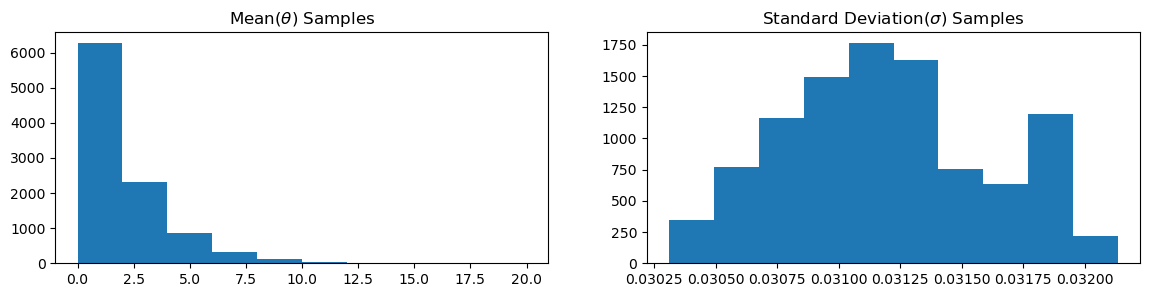

In [7]:
fig,ax = plt.subplots(1,2, figsize=(14,3))
ax[0].hist(theta[0,burn:])
ax[1].hist(1/(tau[0,burn:])**0.5)
ax[0].set_title('Mean($\\theta$) Samples')
ax[1].set_title('Standard Deviation($\\sigma$) Samples')

print("95% Credible Interval (Mean): " + str(np.quantile(theta[0,burn:], [0.025,0.0975])))
print("95% Credible Interval (SD): " + str(np.quantile(1/(tau[0,burn:]**0.5), [0.025,0.0975])))
plt.show('png')

Set $P(\theta)\sim Logistic(\theta_0,\frac{1}{\sqrt{\tau}})$

- We can see from the plot that the acceptance rate is very high since there are now no flat portions of the chain
- $\tau$ chain has trouble converging due to the dependent proposal
- Gibbs sampling requires that we know the full conditionals to actually generate samples
- If we're using Metropolis-Hastings within Gibbs, it is not necessary to know the full conditionals, however using highly dependent proposals will show issues in convergence, as seen in the $\tau$ chain

## Question 3

\begin{align}
P(\tilde x^{(t)}=1|x^{(t-1)}=1) &= q(\tilde x^{(t)}=1 | x^{(t-1)}=1) + q(\tilde x^{(t)}=0 | x^{(t-1)}=1) \cdot [1-min\{1,\frac{P(\tilde x^{(t)}=0)}{P(x^{(t-1)}=1)}\}] \\
&= \frac{1}{2} + \frac{1}{2} \cdot [1-min\{1,\frac{\frac{1}{3}}{\frac{2}{3}}\}]\\
&= 0.75 \\
P(\tilde x^{(t)}=1|x^{(t-1)}=0) &= q(\tilde x^{(t)}=1 | x^{(t-1)}=0) \cdot min\{1,\frac{P(\tilde x^{(t)}=1)}{P(x^{(t-1)}=0)}\} \\
&= \frac{1}{2} \cdot min\{1,\frac{\frac{2}{3}}{\frac{1}{3}}\}\\
&= 0.5 \\
P(\tilde x^{(t)}=0|x^{(t-1)}=1) &= q(\tilde x^{(t)}=0 | x^{(t-1)}=1) \cdot min\{1,\frac{P(\tilde x^{(t)}=0)}{P(x^{(t-1)}=1)}\} \\
&= \frac{1}{2} \cdot min\{1,\frac{\frac{1}{3}}{\frac{2}{3}}\}\\
&= 0.25 \\
P(\tilde x^{(t)}=0|x^{(t-1)}=0) &= q(\tilde x^{(t)}=0 | x^{(t-1)}=0) + q(\tilde x^{(t)}=1 | x^{(t-1)}=0) \cdot [1-min\{1,\frac{P(\tilde x^{(t)}=1)}{P(x^{(t-1)}=0)}\}] \\
&= \frac{1}{2} + \frac{1}{2} \cdot [1-min\{1,\frac{\frac{2}{3}}{\frac{1}{3}}\}]\\
&= 0.5
\end{align}